In [2]:
import numpy as np
from image_processing.floyd_steinberg import floyd_steinberg
from PIL import Image, ImageEnhance

epd_palette = np.uint8([[0,0,0],  [255,255,255],  [0,255,0],   [0,0,255],  [255,0,0],  [255,255,0], [255,128,0]])
is_landscape = False
if is_landscape:
    epd_width = 800
    epd_height = 480
else:
    epd_width = 480
    epd_height = 800

# Open the image
image = Image.open("/Users/raph/Downloads/PXL_20250207_154033847.MP.jpg")

# Calculate the aspect ratio
aspect_ratio = image.width / image.height

# Calculate new dimensions
if aspect_ratio > (epd_width / epd_height):
    new_width = epd_width
    new_height = int(epd_width / aspect_ratio)
else:
    new_height = epd_height
    new_width = int(epd_height * aspect_ratio)

# Resize the image
resized_image = image.resize((new_width, new_height))

In [3]:
# Enhance color and contrast
enhanced_img = ImageEnhance.Color(resized_image).enhance(1.5)
enhanced_img = ImageEnhance.Contrast(enhanced_img).enhance(1.2)

pal_image = Image.new("P", (1,1))
pal_image.putpalette([int(y) for x in epd_palette for y in x] + [0] * (768-len(epd_palette)*3))
quantized_img = enhanced_img.convert("RGB").quantize(
    palette=pal_image, 
    dither=Image.Dither.FLOYDSTEINBERG
).convert("RGB")

In [4]:
np.array(quantized_img).shape

(640, 480, 3)

In [5]:
epd_palette.shape

(7, 3)

In [6]:
result = floyd_steinberg(np.array(enhanced_img), epd_palette, .7, epd_width, epd_height, 0)

TypeError: floyd_steinberg() takes exactly 5 positional arguments (6 given)

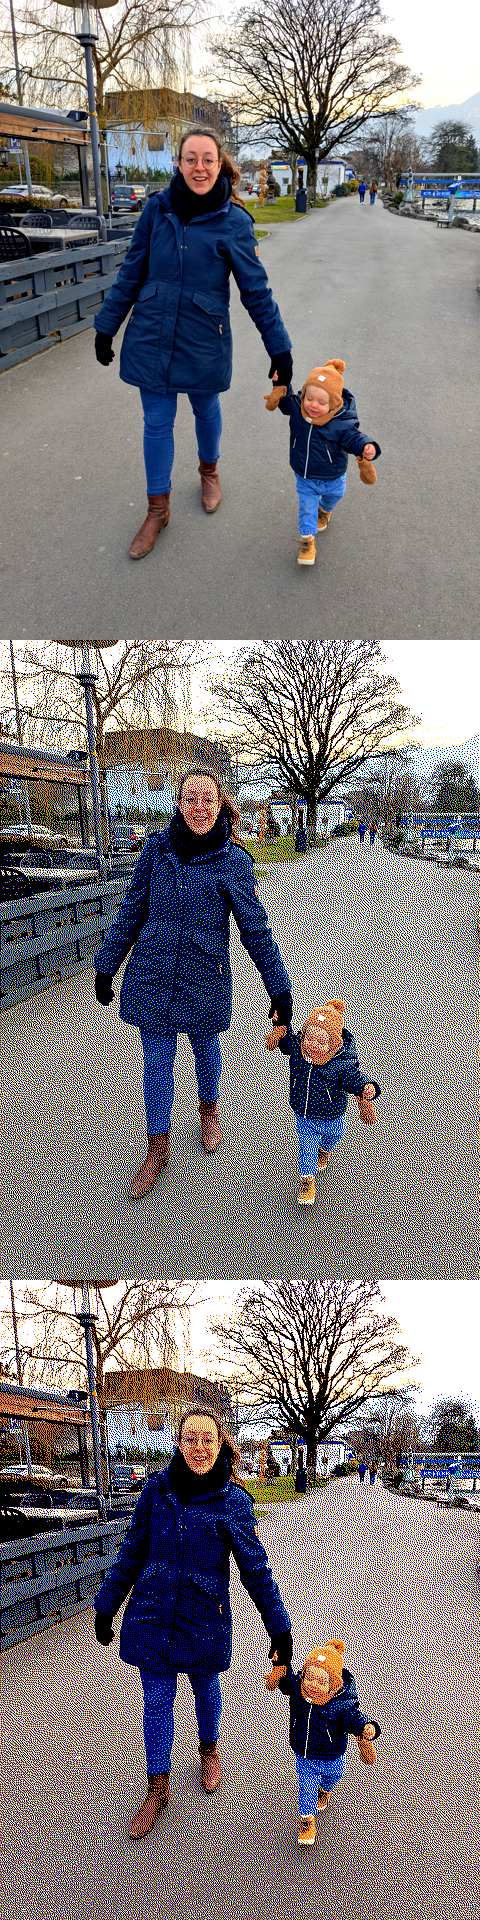

In [33]:
Image.fromarray(np.concat([enhanced_img, np.array(quantized_img), result], axis=0))

In [7]:
(np.array([0,1,2])-np.array([0,2,3])**2).sum()

np.int64(-10)